# TP 2: Apprentissage d'ensembles: les forêts aléatoires

## 1. Le concept

### 1.A. L'idée

### 1.A.1. Le principe

L'*apprentissage d'ensemble* consiste à entraîner une armée de prédicteurs (dans notre cas d'arbres de décisions) pour résoudre un problème de classification. 

Tous ces prédicteurs coopéreront ensemble grâce à un *vote* qui peut soit être *souple* ou *rigide* (*hard* ou *soft* dans la langue de Shakespear). La classe qui aura réuni le plus de vote sera désignée comme la réponse de l'ensemble.

Dans la réalité, cela ressemble à une élection.

In [3]:
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import tensorflow
import matplotlib.pyplot as plt

### 1.A.2 Premier exemple

Pour avoir un premier exemple visuel du concept de forêt aléatoires, nous allons prendre comme base de données les *moons* qui peuvent être générées en utilisant uniquement la bibliothèque *sklearn*. Cette base de données est faite pour créer deux jeux de données en forme de demi-lunes imbriquées l'une dans l'autre avec un bruit additionnel.

In [6]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Les données *moons* sont représentées comme suit:

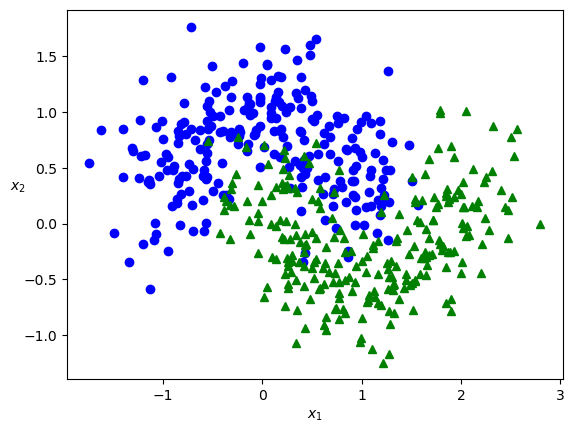

In [7]:
#colors = ["#78785c", "#c47b27"]
colors = ["blue", "green"]
markers = ["o", "^"]
for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$", rotation=0)
plt.show()

### 1.B Apprentissage d'un arbre de décision

**TODO**: Entraîner un arbre de décision sans renseigner de profondeur maximale, pour classifier les données *moons*

In [86]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 1.C. L'union fait la force !

Un arbre de décision c'est très bien. Mais, est-ce qu'entraîner de nombreux arbres de décisions peut améliorer notre prédicition en procédant à un vote ?

Pour que l'entraînement des arbres soit un peu plus court, nous allons *morceller* nos données en sous-ensembles de données et entraîner un arbre sur un morceau de données. Deux choix se présentent lorsque nous devons faire des paquets de données:
- une donnée peut apparaître *plusieurs fois* dans un même sous-ensemble,
- ou apparaître *au plus une fois* dans un sous-ensemble de données.

Le premier cas, consiste à effectuer un *tirage avec remise* (appelé *bagging)* dans notre jeu de données et dans la seconde, on effectue *un tirage sans remise* (appelé *pasting*).

Pour des raisons pratiques nous nous concentrerons uniquement sur le *bagging*.

Une fois que chaque paquet a été crée aléatoirement en effectuant des tirages, nous entraînons un arbre sur ce sous-ensembles de notre ensemble de données initiales.

Cette méthode est déjà implémenté dans *scikit-learn.ensemble* sous le nom *BaggingClassifier*. Pour effectuer des tirages avec remise, il faut faire figurer *bootstraps=True* dans les paramètres de *BaggingClassifier*. 

**TODO**: Entraîner $500$ arbres en utilisant la technique du bagging sur des jeux de données de tailles inférieures à $100$ avec graine d'aléa $42.$


In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True,  n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

**TODO**: En utilisant la fonction *np.meshgrid* de *numpy* tracez les zones de décision de l'arbre sur uen fenêtre représentant les donnnées. Faire de même avec la forêt. Comparez les deux résultats obtenus.

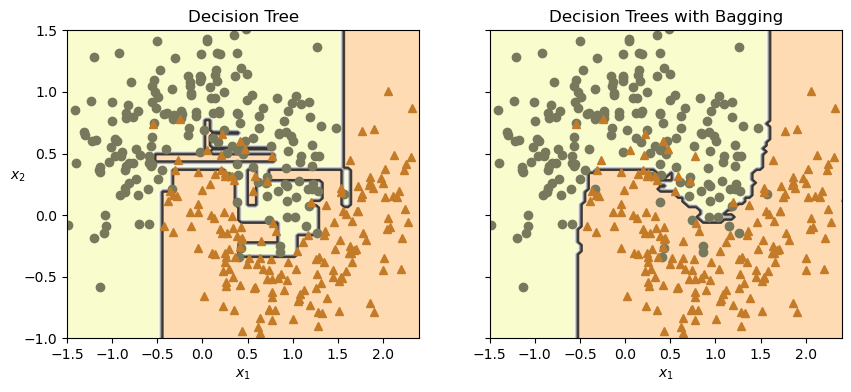

In [88]:
def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)
##################################################################################

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.show()

**TODO**: Comparer les scores de chacune des deux méthodes.

In [89]:
print("Le score de l'arbre sur le jeu de données moons est ",tree_clf.score(X_test,y_test))
print("Le score de la forêt sur le jeu de données moons est ",bag_clf.score(X_test,y_test))

Le score de l'arbre sur le jeu de données moons est  0.856
Le score de la forêt sur le jeu de données moons est  0.904


**TODO**: Comparer les matrices de confusion de ces deux méthodes.

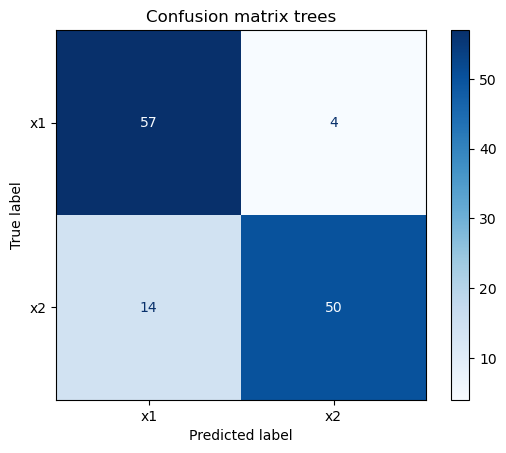

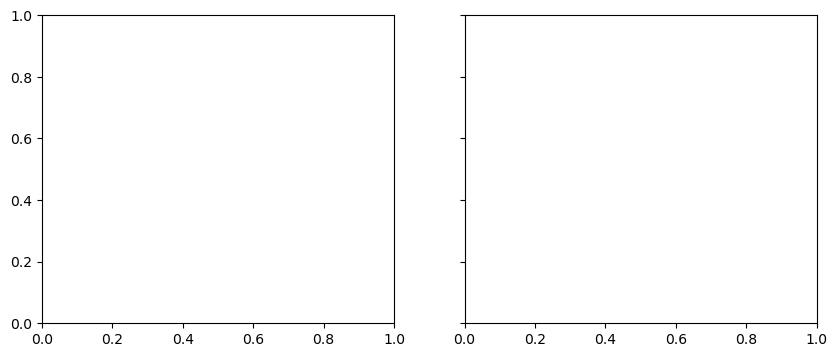

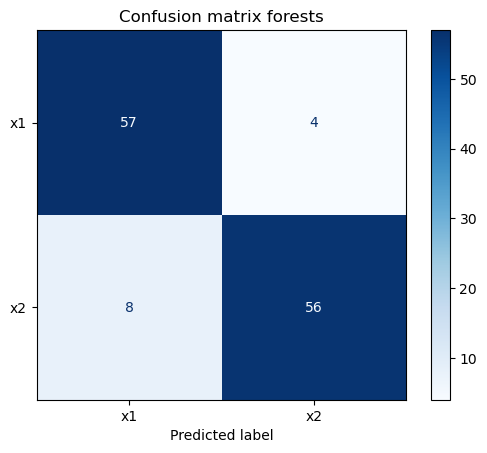

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


Y_pred_tree=tree_clf.predict(X_test)
Y_pred_bag=bag_clf.predict(X_test)

cm_tree=confusion_matrix(y_test,Y_pred_tree)
cm_bag=confusion_matrix(y_test,Y_pred_bag)

disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["x1","x2"])
disp_bag = ConfusionMatrixDisplay(confusion_matrix=cm_bag, display_labels=["x1","x2"])

axes=[-1.5, 2.4, -1, 1.5]
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
disp_tree.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix trees")
plt.sca(axes[1])
disp_bag.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix forests")
plt.ylabel("")
plt.show()

#### 1.D. Comparaison des éléments de la forêts et de la forêts

Nous allons maintenant observer individuellement les éléments de la forêt. Peut-être est-on tombé sur des arbres de décision très efficace à l'intérieur ?

**TODO**: En utilisant la bibliothèque *matplotlib* déssinez la courbe des scores de tous les arbres de la forêt et la droite du scrore de la forêt. Que remarque t-on ?

*Remarque:* pour accéder aux arbres entraînés par la fonction *BaggingClassifier*, nous devons utiliser *.estimators_*.

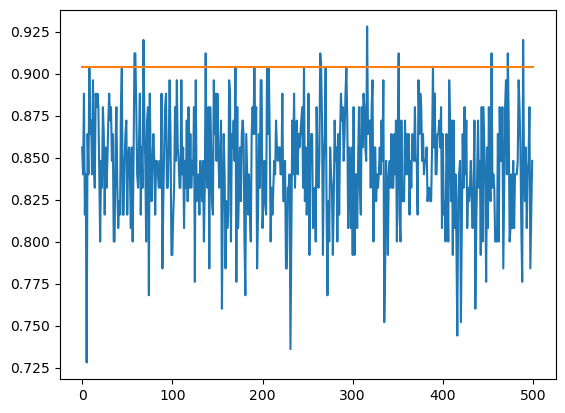

In [91]:
Score_trees=[]
nb_trees=len(bag_clf.estimators_)
Num=range(0,nb_trees)
score_forest=bag_clf.score(X_test,y_test)
for tree in bag_clf.estimators_:
    Score_trees.append(tree.score(X_test,y_test))
plt.plot(Num,Score_trees, label='Score des arbres de la forêt')
plt.plot([0,nb_trees], [score_forest, score_forest], label='Score de la forêt')
plt.show()

### 1.E. Pourquoi cela fonctionne ?

#### 1.E.1 L'explication mathématique

Une première remarque naturelle est: "Si tous les prédicteurs sont identiques, alors on ne peut espérer faire mieux !"

Cela est vrai. Nous allons donc demander que la famille de prédicteurs soit suffisament "*variée*".

Une seconde question naturelle est la suivante: "Pourquoi un ensemble de prédicteurs potentiellement médiocres serait plus efficace que le meilleur prédicteur que nous avons entraîner ?"

Pour cela nous allons faire appel à la *loi des grands nombres*, l'un des plus grands théorèmes de probabilité !
Elle s'énonce de la manière suivante (en termes plus simples à comprendre que la version originale):

**Loi des grands nombres:** Soit $(X_i)_{i\in\{1,\dots,n\}}$ une famille de phénomènes aléatoires *indépendants* identiques (c'est-à-dire que les résultats des uns n'influencent pas les résultats des autres), alors la *moyenne empirique* $\frac{1}{n}\sum_{i=1}^n X_i$ converge vers la *moyenne théorique*.

*Exemples:* 
- pour tout $i\in\{1,\dots,n\}, X_i$ est le résultat d'un lancer de pièce. Si on tombe sur pile, elle vaut $0$ et $1$ sinon. Dans ce cas, si la pièce est équilibrée, on sait que la moyenne empirique de nos résultats vont se rapprocher de $\frac{1}{2}$.
- de même, si la pièce est truquée de manière à tomber $51\%$ du temps sur face, au bout d'un nombre significativement élevé de lancer, nous pourrons affirmer presque sûrement que la pièce est truquée !

Et bien cela est la même chose pour nos arbres ! Pour cela, nous avons juste besoin d'arbres de décisions *indépendants* et n'ayant pas tort trop souvent ! Le défi est alors de générer des forêts aléatoires suffisament différentes.

#### 1.E.2 Un non-exemple

Nous utilisons la commande *VotingClassifier* de la bibliothèque *sklearn.ensemble*, pour créer une famille de prédicteur décidant de la prédiction. Cette fonction prends en argument la famille des prédicteurs et entraîne une copie de ces prédicteurs sur le jeu de données en utilisant *.fit*.

Lorsque nous utilisons *.predict* ce prédicteur réalise un vote de tous les estimateurs et renvoie la classe majoritaire.

In [92]:
from sklearn.ensemble import VotingClassifier

voting_clf=VotingClassifier(estimators=[
    ('tr1',DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('tr2',DecisionTreeClassifier(max_depth=6, random_state=29)),
    ('tr3',DecisionTreeClassifier(max_depth=4, random_state=3)),
    ('tr4',DecisionTreeClassifier(max_depth=6, random_state=50)),
    ('tr5',DecisionTreeClassifier(max_depth=4, random_state=10)),
    ('tr6',DecisionTreeClassifier(max_depth=4, random_state=139)),
    ('tr61',DecisionTreeClassifier(max_depth=4, random_state=139)),
    ('tr62',DecisionTreeClassifier(max_depth=4, random_state=139)),
    ('tr7',DecisionTreeClassifier(max_depth=3, random_state=100)),
    ('tr8',DecisionTreeClassifier(max_depth=3, random_state=2153654))
    ])
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('tr1',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('tr2',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=29)),
                             ('tr3',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=3)),
                             ('tr4',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=50)),
                             ('tr5',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=10)),
                             ('tr6',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=139)),
                             ('tr61',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=139)),
                             ('tr62',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=139)),
                             ('tr7',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=100)),
                             ('tr8',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=2153654))])

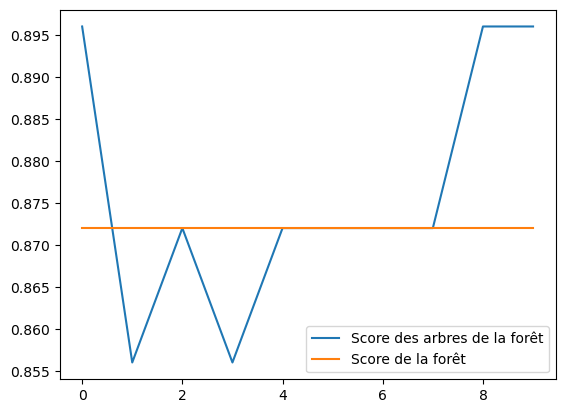

In [93]:
Score_trees=[]
nb_trees=len(voting_clf.estimators_)
Num=range(0,nb_trees)
score_forest=voting_clf.score(X_test,y_test)
for tree in voting_clf.estimators_:
    Score_trees.append(tree.score(X_test,y_test))
plt.plot(Num,Score_trees, label='Score des arbres de la forêt')
plt.plot([0,nb_trees-1], [score_forest, score_forest], label='Score de la forêt')
plt.legend()
plt.show()

#### 1.F. Avec le vote souple

Pour utiliser le vote *souple*, il suffit de renseigner *voting=soft* en paramètre des fonctions *VotingClassifier* et *BaggingClassifier*.
Cette modalité de vote fonctionen avec tous les prédicteurs capables de retourner une probabilité. 

En pratique cette méthode de vote permet d'évincer les votes *incertains* et de ne considérer que les votes des arbres qui ont un avis tranché sur la question.

**TODO**: comparer les graphes de précision entre la version avec vote rigide et vote souple de la dernière famille d'arbre construite.

*Remarque:* par défaut *BaggingClassifier* effectue un vote souple.

In [94]:
voting_clf_soft=VotingClassifier(voting="soft", estimators=[
    ('tr1',DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('tr2',DecisionTreeClassifier(max_depth=6, random_state=29)),
    ('tr3',DecisionTreeClassifier(max_depth=4, random_state=3)),
    ('tr4',DecisionTreeClassifier(max_depth=6, random_state=50)),
    ('tr5',DecisionTreeClassifier(max_depth=4, random_state=10)),
    ('tr6',DecisionTreeClassifier(max_depth=4, random_state=139)),
    ('tr61',DecisionTreeClassifier(max_depth=4, random_state=139)),
    ('tr62',DecisionTreeClassifier(max_depth=4, random_state=139)),
    ('tr7',DecisionTreeClassifier(max_depth=3, random_state=100)),
    ('tr8',DecisionTreeClassifier(max_depth=3, random_state=2153654))
    ])
voting_clf_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('tr1',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('tr2',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=29)),
                             ('tr3',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=3)),
                             ('tr4',
                              DecisionTreeClassifier(max_depth=6,
                                                     random_state=50)),
                             ('tr5',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=10)),
                             ('tr6',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=139)),
                             ('tr61',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=139)),
                             ('tr62',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=139)),
                             ('tr7',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=100)),
                             ('tr8',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=2153654))],
                 voting='soft')

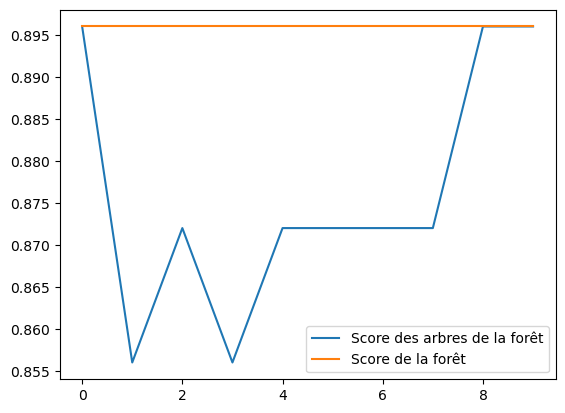

In [95]:
Score_trees=[]
nb_trees=len(voting_clf_soft.estimators_)
Num=range(0,nb_trees)
score_forest=voting_clf_soft.score(X_test,y_test)
for tree in voting_clf_soft.estimators_:
    Score_trees.append(tree.score(X_test,y_test))
plt.plot(Num,Score_trees, label='Score des arbres de la forêt')
plt.plot([0,nb_trees-1], [score_forest, score_forest], label='Score de la forêt')
plt.legend()
plt.show()

Par la suite, plutôt qu'utiliser la commande *BaggingClassifier* et de lui donner des prédicteurs du type *DecisionTreeClassifier*, nous utiliserons la commande optimiser *RandomForestClassifier*.

### 2. Utilisation sur le problème MNIST

#### 2.A. Chargement des données MNIST

Nous entraînerons nos forêts sur le modèle *MNIST* chargé ci-dessous.

In [100]:
import numpy as np
# paquet simplifié pour tensorflow
from tensorflow import keras

# Bibliothèque d'exemple
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Taille des images (28, 28)
Nombre d'images d'entrainement 60000
Nombre d'images de test 10000


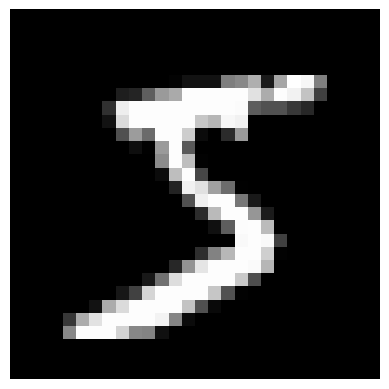

In [101]:
# importation des données
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()# Taille de la première image (et des autres en théorie)
print("Taille des images",np.shape(X_train_data[0]))

# Longueur du vecteur d'image d'entrainement donc nombre 
# d'images d'entrainement
print("Nombre d'images d'entrainement",len(X_train_data))

# Nombre d'images de test
print("Nombre d'images de test",len(X_test_data))

# Première matrice
img = X_train_data[0]

# Affichage de la première image
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

On réécrit nos données pour que cela soit compréhensible pour l'arbre de décision:

In [102]:
# nombre d'images
N = len(X_train_data)
M = len(X_test_data)

# On crée un tableau contenant N vecteurs de taille 784 représentant les images
X_train = np.reshape(X_train_data,(N,784))
X_test = np.reshape(X_test_data,(M,784))

#### 2.B. Un arbre de décision sur le test MNIST

Entraînons un arbre bon et cinq arbres médiocres à la reconnaissance de chiffres via l'écriture manuscrite.

**TODO**: Entraîner un arbre de profondeur $10$ sur les données *MNIST*.

*Remarque:* nous avons vu qu'en terme de rapport efficacité/profondeur mettre $10$ niveaux de profondeur était un bon compromis.

In [103]:
tree_clf10=DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf10.fit(X_train,Y_train_data)

DecisionTreeClassifier(max_depth=10, random_state=42)

La précision de cet arbre est de 0.8995166666666666


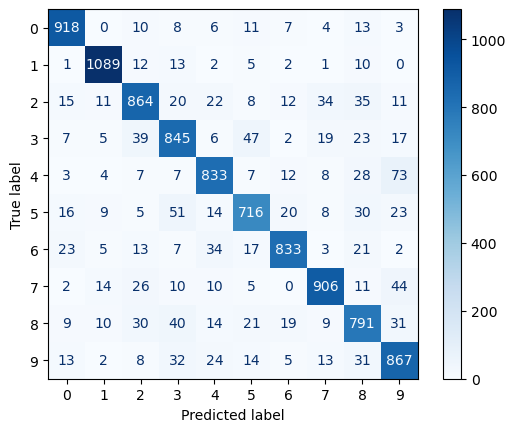

In [104]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

Y_predict=tree_clf10.predict(X_test)
cm=confusion_matrix(Y_test_data,Y_predict)

tree_conf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1','2','3','4','5','6','7','8','9'])

tree_conf.plot(cmap=plt.cm.Blues)
plt.show

print("La précision de cet arbre est de", tree_clf10.score(X_train,Y_train_data))

#### 2.C Les forêts aléatoires pour le test MNIST

Une famille d'arbres de décision entraîné avec la méthode de *tirage avec remise/bagging* sera appelée une *forêt aléatoire*.

Pour construire de telles forêts nous utiliserons la commande *RandomForestClassifier* de la bibliothèque *sklearn.ensemble*.

**TODO**: entraîner une forêt alétoire pour le problème de classification *MNIST* avec *100* arbres et graine d'aléa $42$. Puis, comparer avec l'arbre de décision précédement calculé en comparant les précisions et matrices de confusion.

In [109]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier(n_estimators=100, max_depth=9, n_jobs=-1, random_state=42)
rand_forest.fit(X_train,Y_train_data)

RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=42)

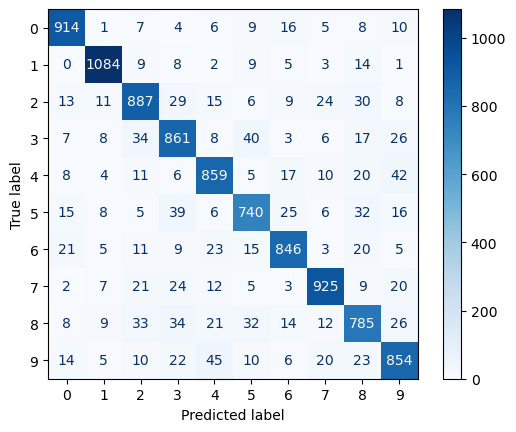

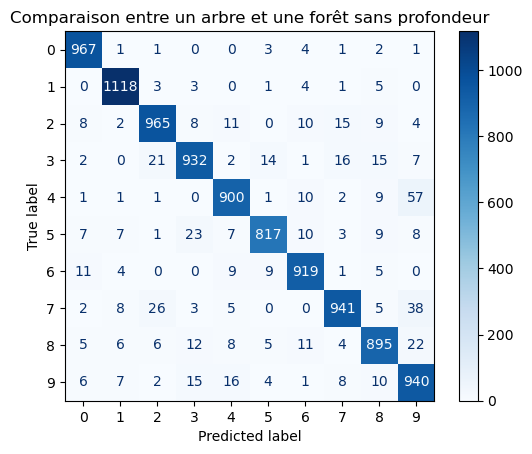

In [111]:
Y_predict=rand_forest.predict(X_test)
cm=confusion_matrix(Y_test_data,Y_predict)

rand_forest_conf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1','2','3','4','5','6','7','8','9'])

tree_clf=DecisionTreeClassifier( random_state=42)
tree_clf.fit(X_train,Y_train_data)
Y_predict=tree_clf.predict(X_test)
cm=confusion_matrix(Y_test_data,Y_predict)

tree_clf_conf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1','2','3','4','5','6','7','8','9'])

tree_clf_conf.plot(cmap=plt.cm.Blues)
rand_forest_conf.plot(cmap=plt.cm.Blues)
plt.title("Comparaison entre un arbre et une forêt sans profondeur")
plt.show()

In [112]:
# Pour ce qui est des précisions
print("La précision de l'arbre de décision est de :", tree_clf.score(X_test,Y_test_data))
print("La précision de la forêt aléatoire est de : ", rand_forest.score(X_test,Y_test_data))

La précision de l'arbre de décision est de : 0.8755
La précision de la forêt aléatoire est de :  0.9394


*Remarque:* essentiellement, la tâche la plus longue lors de l'entraînement d'une forêts aléatoires est (une fois la variable à optimiser choisie) la recherche du seuil optimal. Quitte à faire des choix aléatoires, nous pouvons accélérer ce processus en tirant les seuils aléatoirement également.

Cette technique est une bonne idée pour gagner en temps de calcul mais résulte d'une perte en précision qui peut-être compensée si on utilise un nombre suffisament élevé d'arbres dans la forêt.

### 2.D. Mise en valeur des pixels importants

Lors de l'entraînement des forêts aléatoires, une notion d'*importance* des variables est calculée en permanence. Une variable est déclarée importante si toutes les optimisations réalisées sur cette variable engendre une réduction importante de l'impurté des noeuds fils.

Pour récupérer l'importance des variables d'une forêt aléatoire, il suffit d'utiliser la commande *feature_importances_*.

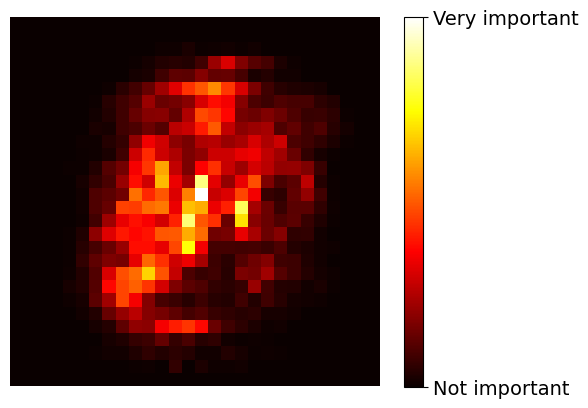

In [114]:
heatmap_image = rand_forest.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rand_forest.feature_importances_.min(),
                           rand_forest.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
plt.show()


## 3. Introduction au boosting: boosting de gradient

Dans cette partie, nous allons continuer d'entraîner des forêts d'arbres de décisions mais nous procéderons d'une manière différente. 
Nous présentons cette technique dans le cadre de la *régression* mais cette dernière peut tout à fait s'appliquer dans le cadre d'un problème de *classification*.

Cette technique de boosting a des avantages et des inconvénients:
- elle est non *parallélisable*, car nous aurons besoin de connaître l'arbre de décision précédent avant d'avancer;
- elle rentabilise les coûts d'apprentissage.

Tout d'abord, désinons les données

Nous entraînerons un premier arbre $T_1$ sur notre jeu donnée qui effectuera des *erreurs* $E_1$.

Puis, on entraînera un arbre $T_2$ sui apprendra les *erreurs* $E_1$ de l'arbre $T_1$. Ce dernier commettra aussi des erreurs $E_2$, qu'un  autre arbre se chargera d'apprendre et ainsi de suite.

### 3.A. Les données

Nous générons le nuage de points suivants:

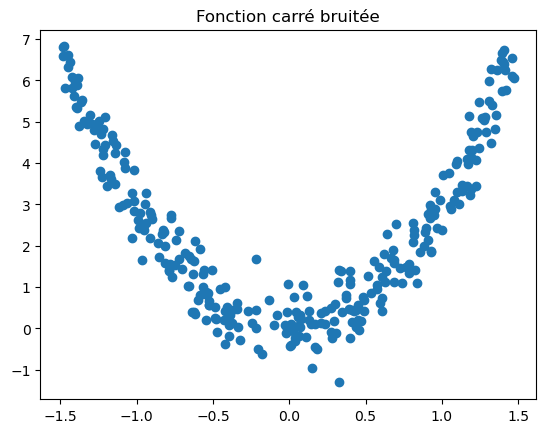

In [117]:
np.random.seed(42)
X = np.random.rand(300, 1)*3 - 1.5
y = 3 * X[:, 0] ** 2 + 0.5 * np.random.randn(300)

plt.plot(X,y,'o')
plt.title("Fonction carré bruitée")
plt.show()

Nous vous offrons généreusement une fonction pour dessiner les prédictions dans ce contexte:

In [122]:
def plot_predictions(regressors, X, y, axes, style,
                     label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))
                 for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

**TODO**: entrainez un premier arbre pour faire de la régression linéaire sur le nuage de points obtenus.

In [125]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1=DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

**TODO**: entrainez un second arbre sur les erreur de *tree_reg1*. En déduire une amélioration de la prédicitio globale.

In [134]:
E1=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X,E1)

## Lon peut améliorer la prédicition en retournant tree_reg1.predict(X)+tree_reg2.predict(X)

DecisionTreeRegressor(max_depth=2, random_state=42)

**TODO**: entrainez un troisième arbre sur les erreurs de *tree_reg2*. En déduire une amélioration de la prédicition globale.

In [135]:
E2=E1-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X,E2)

DecisionTreeRegressor(max_depth=2, random_state=42)

**TODO**: Avec ces trois arbres de décision, donnez un prédicteur plus précis que le premier arbre. Tracez sur une fenêtre les prédictions de l'arbre

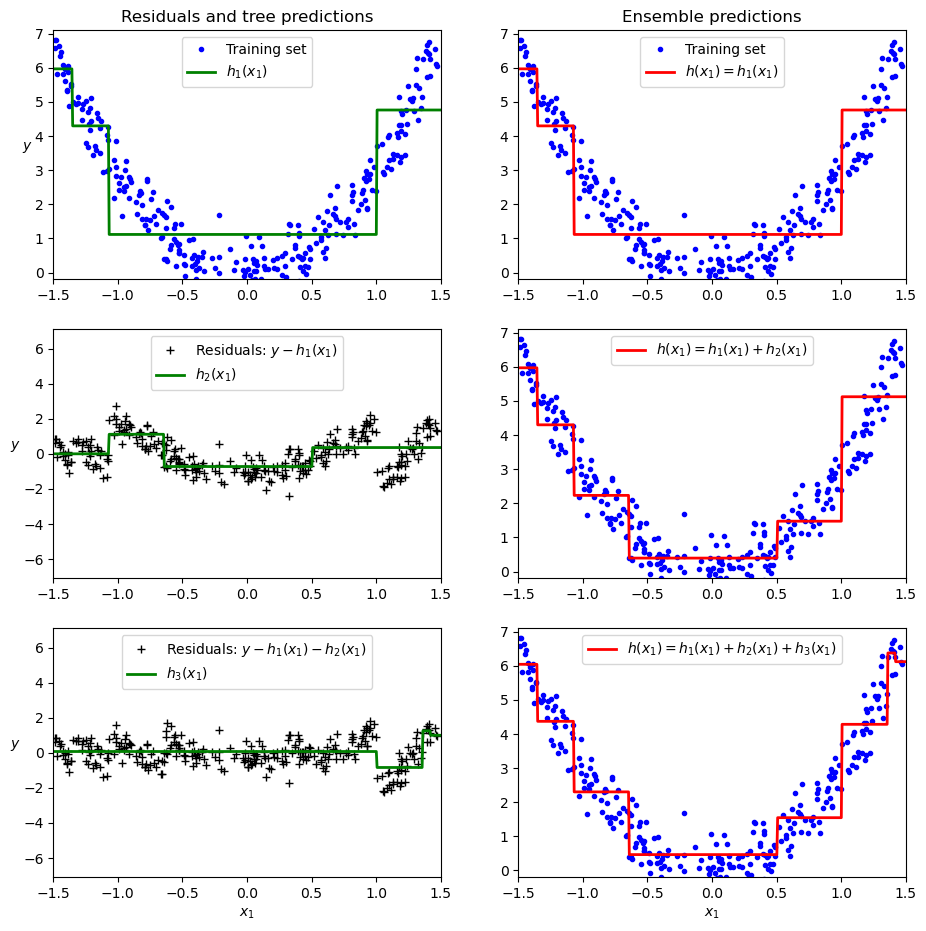

In [141]:

plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg1], X, y, axes=[-1.5, 1.5, -0.2, 7.1], style="g-",
                 label="$h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$  ", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(3, 2, 2)
plot_predictions([tree_reg1], X, y, axes=[-1.5, 1.5, -0.2, 7.1], style="r-",
                 label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, E1, axes=[-1.5, 1.5, -7.1, 7.1], style="g-",
                 label="$h_2(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1)$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 4)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-1.5, 1.5, -0.2, 7.1],
                  style="r-", label="$h(x_1) = h_1(x_1) + h_2(x_1)$")

plt.subplot(3, 2, 5)
plot_predictions([tree_reg3], X, E2, axes=[-1.5, 1.5, -7.1, 7.1], style="g-",
                 label="$h_3(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 6)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-1.5, 1.5, -0.2, 7.1], style="r-",
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$")

plt.show()

Cette méthode est déjà implémentée dans la bibliothèque *sklearn.ensemble* sous la commande *GradientBoostingRegressor*.

Text(0, 0.5, '$y$')

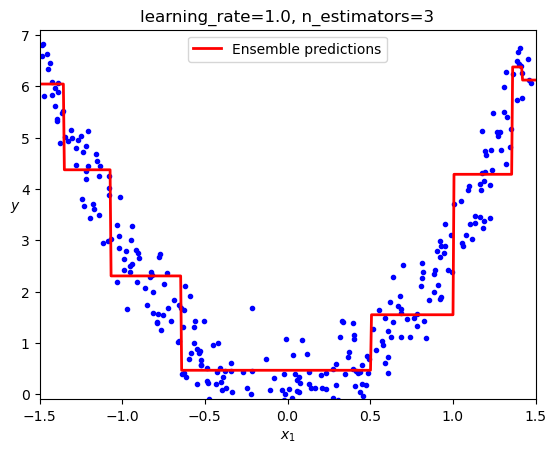

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                 learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

plot_predictions([gbrt], X, y, axes=[-1.5, 1.5, -0.1, 7.1], style="r-",
                 label="Ensemble predictions")
plt.title(f"learning_rate={gbrt.learning_rate}, "
          f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)